# Visualization
## Machine Learning 1
### `! git clone https://github.com/DS3001/visualization`

## Communication and Visualization
- The previous lecture was about using plots and statistics to understand a variable (histograms, quantiles, boxplots, outliers, statistics)
- This lecture is more about making more attractive and informative visualizations that you could use in your work
- Putting together the EDA and Visualizations into an analysis is basically the first project

## Fast, Attractive Visualizations: Seaborn
- Quick and dirty Pandas plots can be very useful for cleaning when you only want to tap out a few commands and get quick results
- But when you move on to more in-depth EDA, being able to dig deeper into relationships in the data is extremely valuable
- There is a much more useful and aesthetically pleasing tool called `seaborn`, which is meant to mimic `ggplot2` for R
- The import command is typically `import seaborn as sns`
- MatPlotLib is useful too, but we'll mostly use it as a general purpose graphing utility for basic lines and scatterplots, and will cover it a bit more as we go along in the class

In [1]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns # Import Seaborn

df = pd.read_csv('./data/pretrial_data.csv') # Load the pretrial data

# Transform some badly scaled variables:
df['bond_arcsinh'] = np.arcsinh(df['bond'])
df['sentence_arcsinh'] = np.arcsinh(df['sentence'])
df['prior_F_arcsinh'] = np.arcsinh(df['prior_F'])
df['prior_M_arcsinh'] = np.arcsinh(df['prior_M'])

df.columns.tolist() # A list of the available variables

['Unnamed: 0',
 'case_type',
 'age',
 'sex',
 'race',
 'is_poor',
 'bond',
 'bond_type',
 'prior_F',
 'prior_M',
 'gini',
 'released',
 'sentence_type',
 'sentence',
 'bond_NA',
 'held_wo_bail',
 'sentence_NA',
 'bond_arcsinh',
 'sentence_arcsinh',
 'prior_F_arcsinh',
 'prior_M_arcsinh']

## Basic Plots
- All the plots we made with Pandas can be done in Seaborn with almost the same syntax:
    - Histogram: `sns.histplot(df[varName])` or `sns.histplot(data=df,x=varName)`
    - Density: `sns.kdeplot(df[varName])` or `sns.kdeplot(data=df,x=varName)`
    - Boxplot: `sns.boxplot(df[varName])` or `sns.boxplot(data=df,x=varName)`
    - Scatterplot: `sns.scatterplot(df[varName1],df[varName2])` or `sns.scatterplot(data=df,x=varName1, y=varName2)`

<Axes: xlabel='gini', ylabel='Count'>

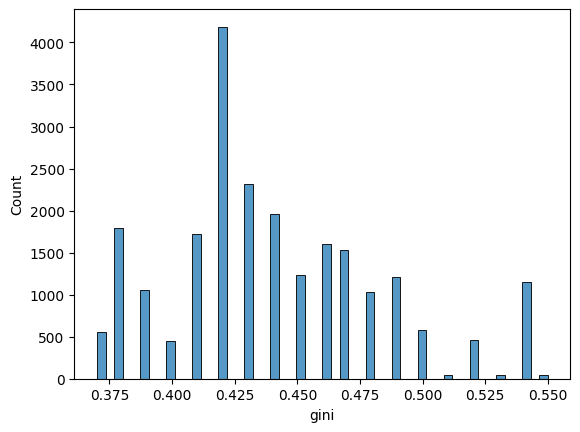

In [2]:
var = 'gini'
sns.histplot(df[var]) # A histogram
#sns.histplot(data=df, x=var) # Same thing

<Axes: xlabel='gini', ylabel='Density'>

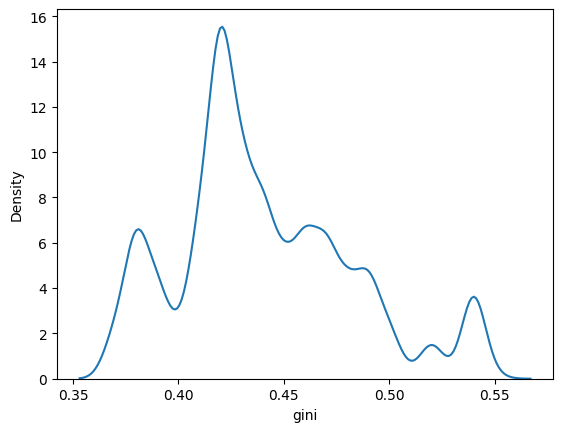

In [3]:
var = 'gini'
sns.kdeplot(df[var]) # A kernel density plot
#sns.kdeplot(data=df, x=var) # Same thing

<Axes: xlabel='gini'>

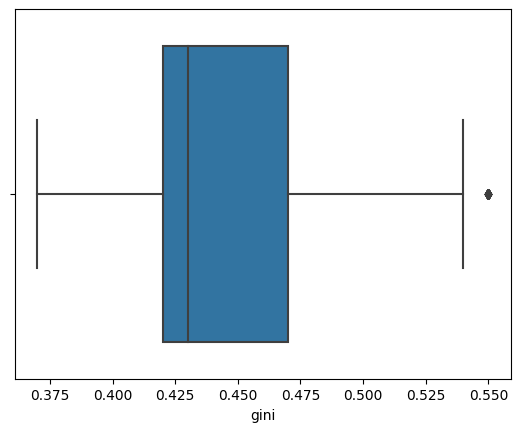

In [4]:
var = 'gini'
#sns.boxplot(df[var]) # A boxplot
sns.boxplot(data=df, x=var) # Same thing, but horizontal

<Axes: xlabel='sentence_arcsinh', ylabel='bond_arcsinh'>

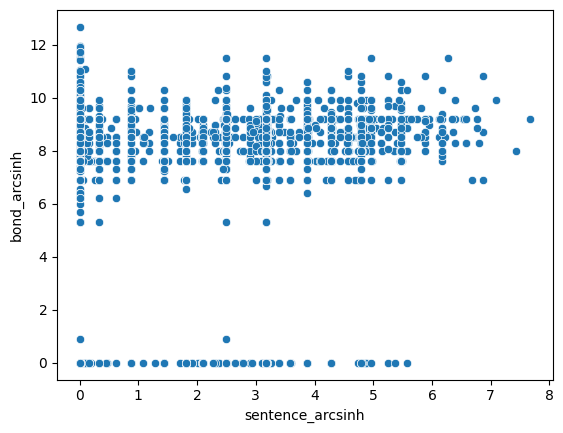

In [5]:
var1 = 'sentence_arcsinh'
var2 = 'bond_arcsinh'
sns.scatterplot(x=df[var1],y=df[var2]) # A scatterplot
#sns.scatterplot(data=df, x=var1, y=var2) # Same thing

## Grouping
- Grouping was a powerful tool for statistics and kernel densities: Perform the same analyis for each category of a categorical variable
- Grouping is easy in Seaborn, and it makes plots much more informative:
    - `hue` controls the color 
    - `style` controls the shape
- Let's start with scatterplots

<Axes: xlabel='bond_arcsinh', ylabel='sentence_arcsinh'>

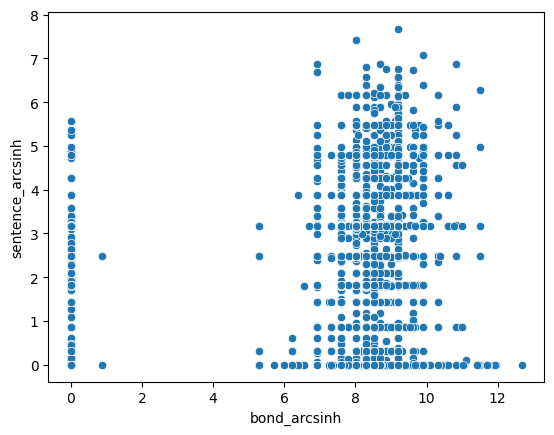

In [6]:
var1 = 'bond_arcsinh' # A numeric variable
var2 = 'sentence_arcsinh' # Another numeric
cat1 = 'case_type' # A categorical variable
cat2 = 'is_poor' # A categorical variable

sns.scatterplot(data=df, x=var1, y=var2) # Our initial plot

<Axes: xlabel='bond_arcsinh', ylabel='sentence_arcsinh'>

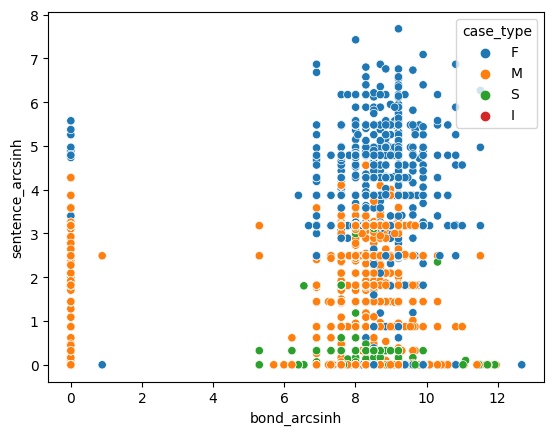

In [7]:
sns.scatterplot(data=df, x=var1, y=var2, hue=cat1) # Coloring dots by case_type

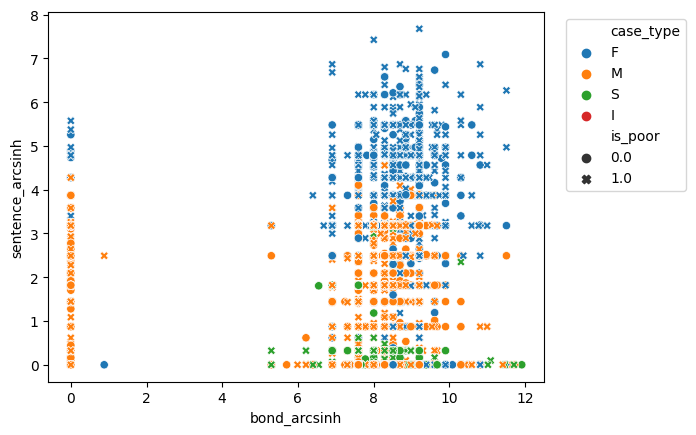

In [8]:
this_plot = sns.scatterplot(data=df, x=var1, y=var2, hue=cat1, style=cat2) # Two kinds of grouping
sns.move_legend(this_plot, "upper right", bbox_to_anchor=(1.3, 1)) # Moves the Legend

## Grouped Histograms and Kernel Densities
- Grouping with histograms shows the breakdown of a bar into categories
- Grouping with the density shows how the frequencies of different groups' values compare

<Axes: xlabel='prior_M_arcsinh', ylabel='Count'>

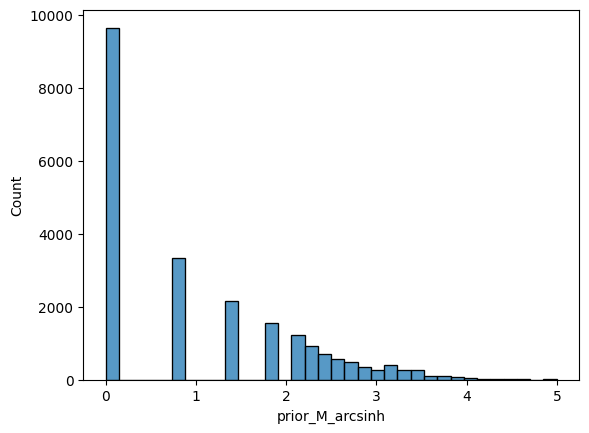

In [9]:
var1 = 'prior_M_arcsinh'
var2 = 'prior_F_arcsinh'
cat1 = 'case_type'
cat2 = 'is_poor'

sns.histplot(data=df, x=var1) # Our initial plot

<Axes: xlabel='prior_M_arcsinh', ylabel='Count'>

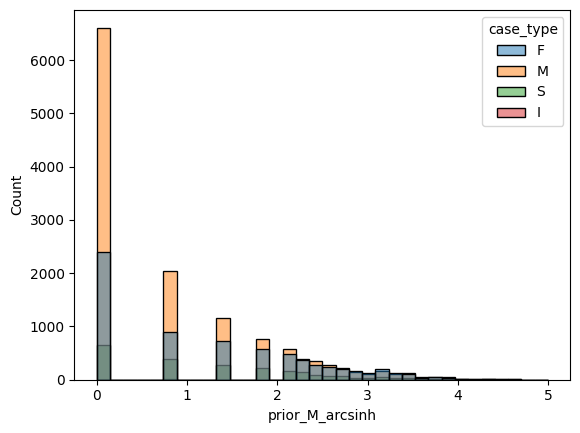

In [10]:
sns.histplot(data=df, x=var1, hue = cat1) # By case type

<Axes: xlabel='prior_M_arcsinh', ylabel='Proportion'>

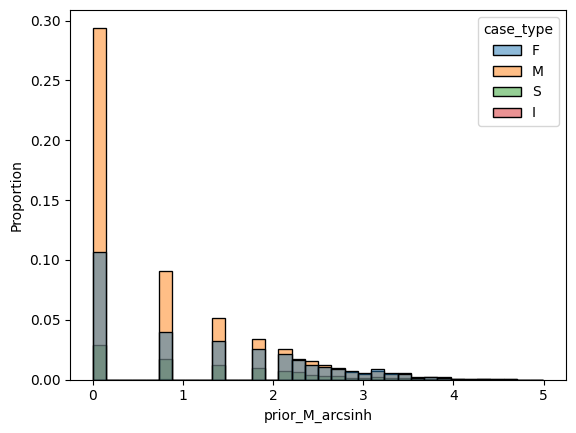

In [11]:
sns.histplot(data=df, x=var1, hue = cat1, stat='proportion') # Proportion versus count

<Axes: xlabel='prior_M_arcsinh', ylabel='Count'>

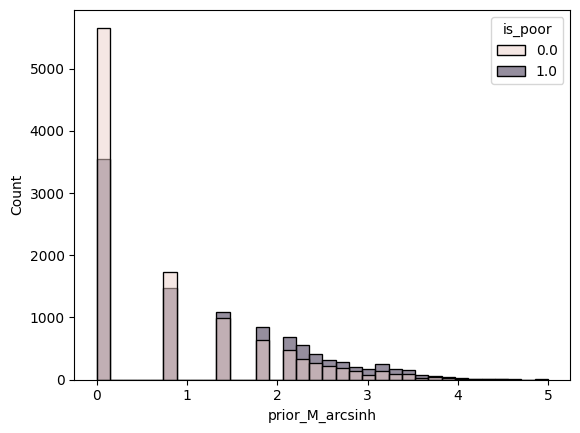

In [12]:
sns.histplot(data=df, x=var1, hue = cat2) # By indigency status

<Axes: xlabel='prior_M_arcsinh', ylabel='Density'>

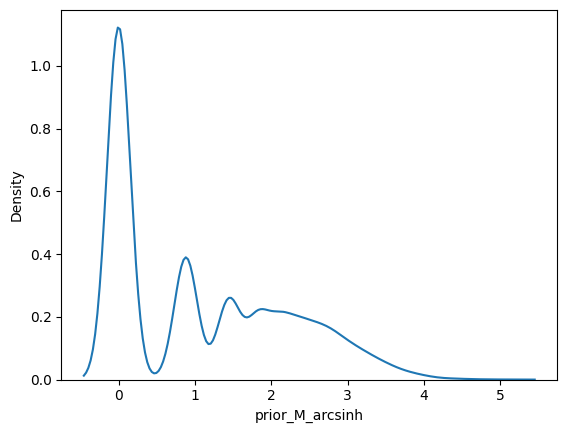

In [13]:
var1 = 'prior_M_arcsinh'
var2 = 'prior_F_arcsinh'
cat1 = 'case_type'
cat2 = 'is_poor'

sns.kdeplot(data=df, x=var1) # Our initial plot

<Axes: xlabel='prior_M_arcsinh', ylabel='Density'>

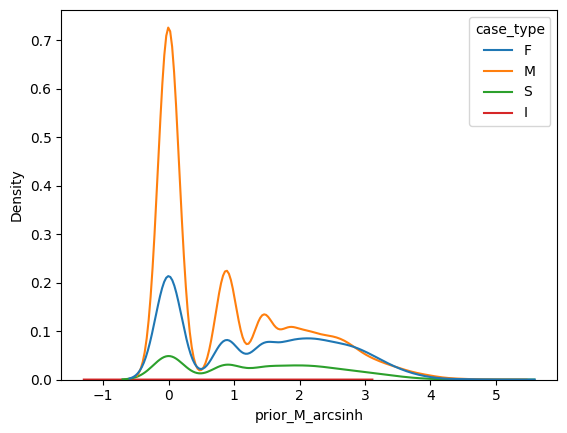

In [14]:
sns.kdeplot(data=df, x=var1, hue=cat1) # Grouped by case-type

<Axes: xlabel='prior_M_arcsinh', ylabel='Density'>

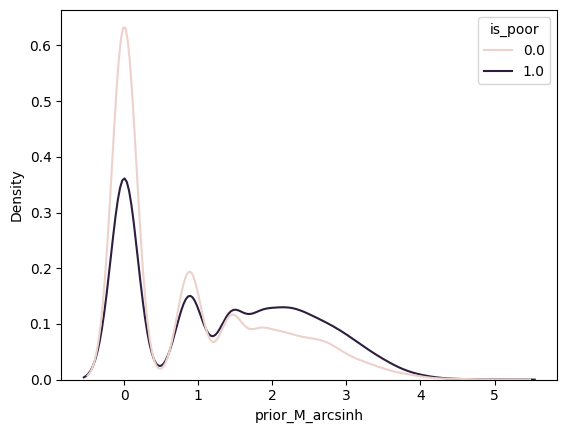

In [15]:
sns.kdeplot(data=df, x=var1, hue=cat2) # Grouped by indigency status

<Axes: xlabel='age', ylabel='Density'>

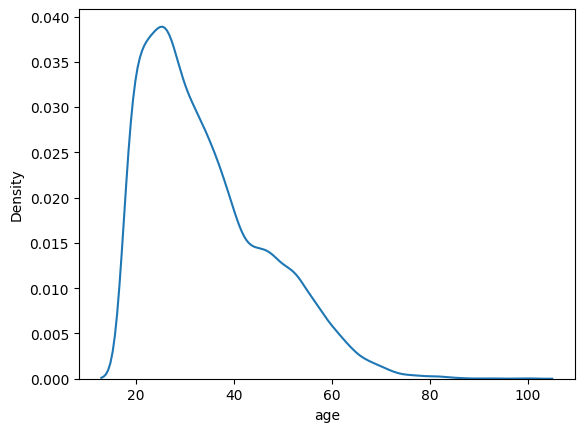

In [16]:
sns.kdeplot(data=df,x='age') # Using a log scale

<Axes: xlabel='age_log', ylabel='Density'>

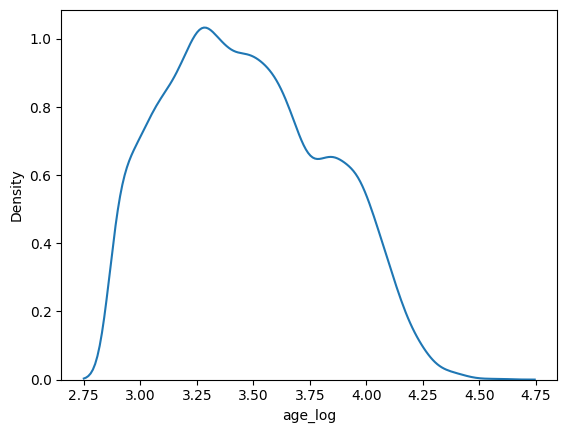

In [17]:
df['age_log'] = np.log(df['age'])
sns.kdeplot(data=df,x='age_log') # Using a log transformation

<Axes: xlabel='age', ylabel='Density'>

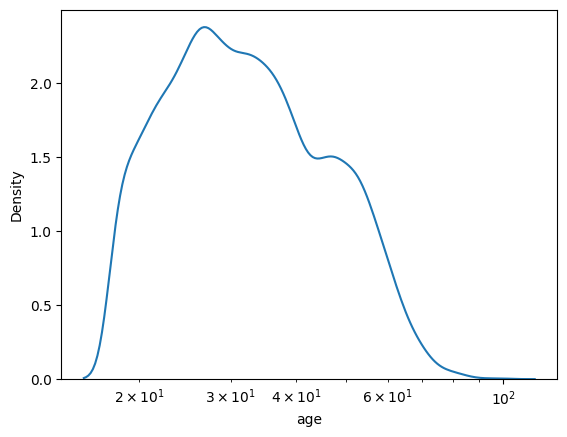

In [18]:
sns.kdeplot(data=df,x='age',log_scale=True) # Transforming the axis

## Violin Plot: Simultaneous Density/Boxplot
- Violin plots exhibit a density plot, kind of rotated around the axis, as well as a box plot
- My wife haaaaates these
- I think they are not super scientific but kind of fun to look at?

<Axes: xlabel='case_type', ylabel='gini'>

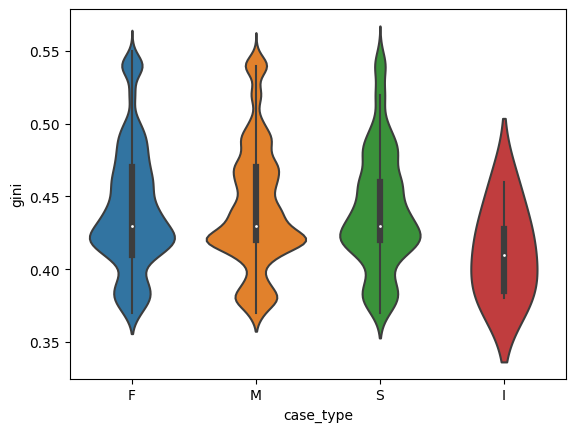

In [19]:
category = 'case_type'
values = 'gini'
sns.violinplot(x=category,y=values,data=df)

<Axes: xlabel='case_type', ylabel='bond_arcsinh'>

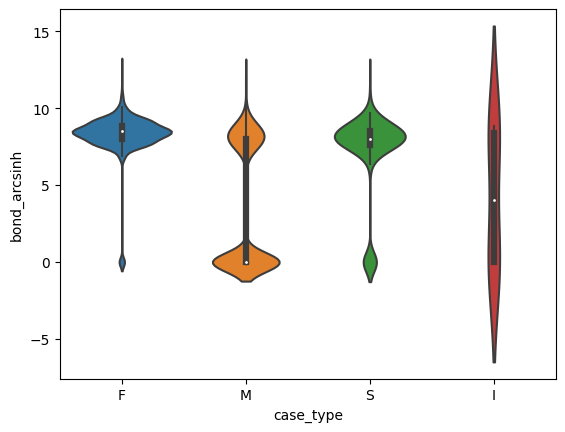

In [20]:
category = 'case_type'
values = 'bond_arcsinh'
sns.violinplot(x=category,y=values,data=df)

## Jointplot: Scatterplot upgrade
- Similar to the violin plot combining a density with a boxplot, the jointplot combines a histogram with a scatterplot
- The goal is to see the distribution of the variables as well as how they covary together

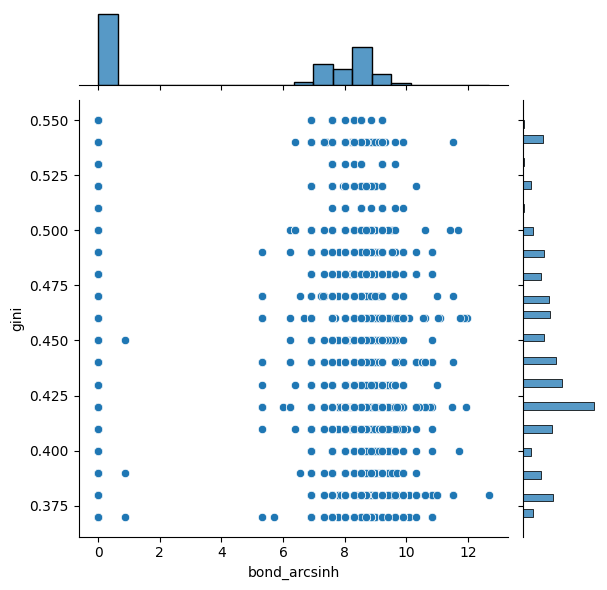

In [21]:
var2 = 'gini'
var1 = 'bond_arcsinh'
sns.jointplot(x=var1,y=var2,data=df)

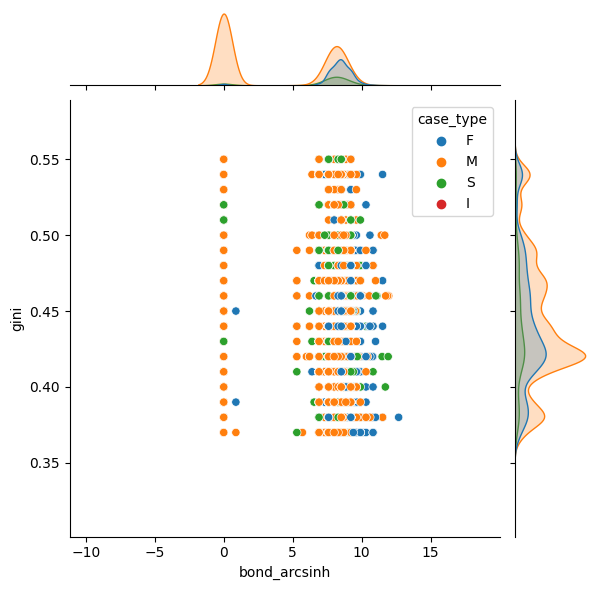

In [22]:
sns.jointplot(x=var1,y=var2,data=df,hue='case_type') # Check out that plot!

## Visualizing Prevalence
- Graphs can be very misleading about where the data are actually distributed
- A **rugplot** places tick marks along the axes to show you where observations are
- A **hexbin** tiles the area with hexes, and shades the hex to match the number of observations in the hex -- these can very starkly illustrate where the data are, and aren't

<Axes: xlabel='prior_M', ylabel='prior_F'>

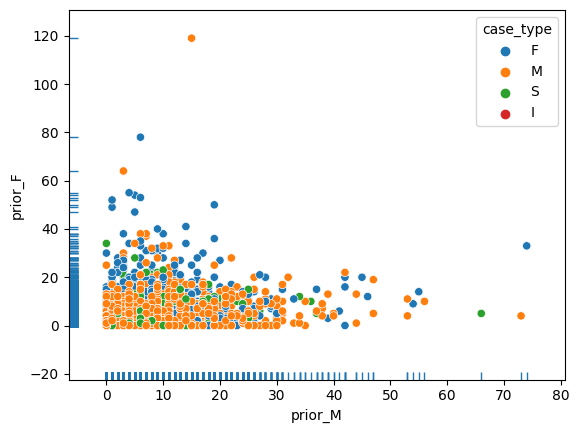

In [23]:
var1 = 'prior_M'
var2 = 'prior_F'
cat1 = 'case_type'
cat2 = 'is_poor'

sns.scatterplot(data=df, x=var1, y=var2,hue=cat1)
sns.rugplot(data=df, x=var1, y=var2, height=.02)

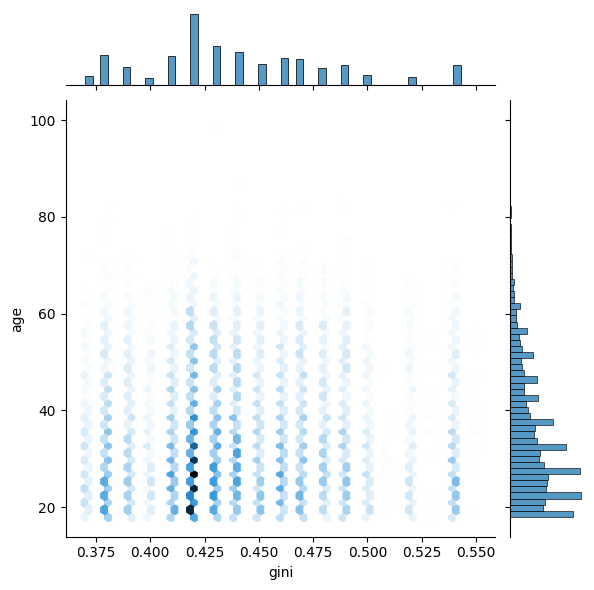

In [24]:
sns.jointplot(x='gini',y='age',data=df,kind='hex') # More evenly distributed

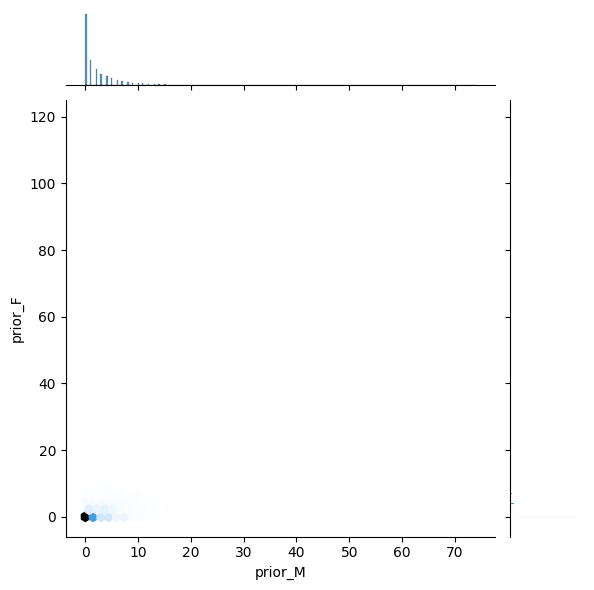

In [25]:
sns.jointplot(x='prior_M',y='prior_F',data=df,kind='hex') # Check out that plot!

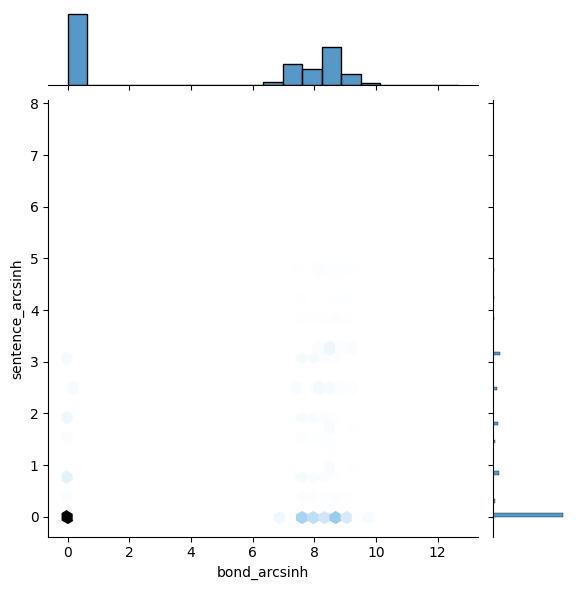

In [26]:
sns.jointplot(y='sentence_arcsinh',x='bond_arcsinh',data=df,kind='hex') # Hexbin Graph

## Kernel Density Plots [Math]
- The rugplot might also help you understand density plots better
- The histogram is defined as
$$
\hat{f}_w(x) = \dfrac{1}{Nw} \sum_{i=1}^N \underbrace{\dfrac{\mathbb{I}\{ |x-x_i|<w \}}{2}}_{K(x,x_i)} = \dfrac{1}{Nw} \sum_{i=1}^N K\left( \dfrac{x-x_i}{w} \right)
$$

where $K(x,x_i)$ is a *kernel function* that takes the value 1 if $x_i$ is in the window and $0$ if it is not
- A kernel density function replaces the indicator kernel, which jumps discontinuously, with a smoother kernel like the normal distribution:
$$
\hat{f}_w(x) = \dfrac{1}{Nw} \sum_{i=1}^N \underbrace{ \dfrac{1}{\sqrt{2 \pi \sigma}} \exp \left\lbrace - \left( \frac{x-x_i}{\sigma w} \right)^2 \right\rbrace}_{K_\sigma\left( \frac{x-x_i}{w}\right) } = \dfrac{1}{Nw} \sum_{i=1}^N K_\sigma\left( \dfrac{x-x_i}{w} \right)
$$

- Kernel density plots are a subset of *non-parametric statistics* that you can spend a whole semester or career on


<Axes: xlabel='age', ylabel='Density'>

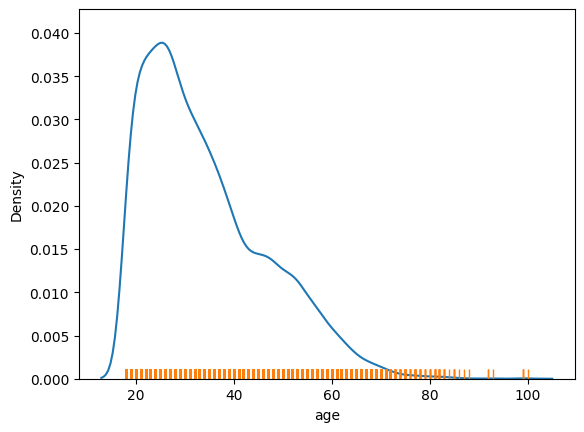

In [27]:
sns.kdeplot(data=df,x='age')
sns.rugplot(data=df, x="age")

## Example: Time Use Data
- How do Americans spend their time over their lives?
- A row gives the fraction of time spent on each activity at that age, a column is an activity
- This format of data comes up a lot, and it is often inconvenient to work with

In [28]:
tdf = pd.read_csv('./data/time_use.csv')
print(tdf.shape)
print(tdf.columns)

tdf = tdf.rename(columns = {'Year':'year',
                            'Time spent alone, by age of respondent (United States)':'alone',
       'Time spent with friends, by age of respondent (United States)':'friends',
       'Time spent with children, by age of respondent (United States)':'children',
       'Time spent with with parents, siblings and other family, by age of respondent (United States)':'family',
       'Time spent with partner, by age of respondent (United States)':'partner',
       'Time spent with coworkers, by age of respondent (United States)':'coworkers'})

# Converts time levels to proportions:
props = tdf.iloc[:,1:7]
tdf.iloc[:,1:7] = props.apply(lambda x: x/x.sum(), axis=1) # Convert minutes to proportions
tdf.head()



(67, 7)
Index(['Year', 'Time spent alone, by age of respondent (United States)',
       'Time spent with friends, by age of respondent (United States)',
       'Time spent with children, by age of respondent (United States)',
       'Time spent with with parents, siblings and other family, by age of respondent (United States)',
       'Time spent with partner, by age of respondent (United States)',
       'Time spent with coworkers, by age of respondent (United States)'],
      dtype='object')


,year,alone,friends,children,family,partner,coworkers
0,15,0.321294,0.181858,0.038999,0.443983,0.000000,0.013865
1,16,0.330923,0.177579,0.045877,0.407841,0.000049,0.037730
2,17,0.347324,0.186572,0.040422,0.356066,0.001740,0.067877
3,18,0.331773,0.188308,0.037439,0.323097,0.007788,0.111595
4,19,0.343517,0.166577,0.046750,0.258191,0.024810,0.160154


## Melting Data
- The `df.melt(id_vars=index)` method turns the columns into rows that correspond to the `index` variable
- This is super useful for all kinds of data, often with a time dimension but not always
- This is essential for making a lot of useful visualizations
- Once the data are in this form, you can use the `index` as the variable on the horizontal axis, the `value` variable on the vertical axis, and hue by `variable` to get a time series plot

In [29]:
hdf = tdf.melt(id_vars='year') # Melt the data

In [30]:
hdf.head()

,year,variable,value
0,15,alone,0.321294
1,16,alone,0.330923
2,17,alone,0.347324
3,18,alone,0.331773
4,19,alone,0.343517


[Text(0.5, 1.0, 'Time Use'), Text(0.5, 0, 'Year'), Text(0, 0.5, 'Proportion')]

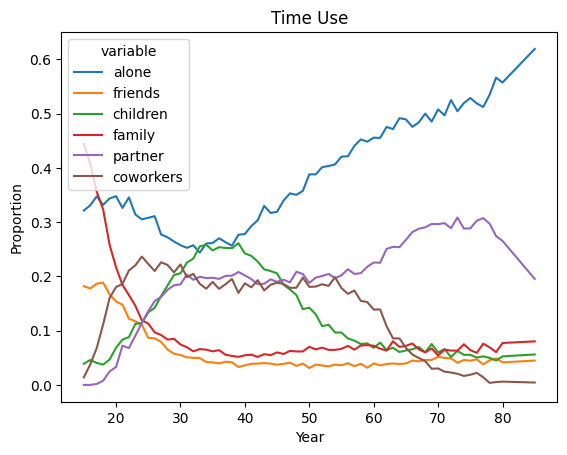

In [31]:
sns.lineplot(data=hdf,x='year',y='value',hue='variable').set(title='Time Use',xlabel=
                                                                   'Year',ylabel='Proportion') # Plotting by variable
# This is the most depressing graph I've ever made.